In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import uncertainties
import uncertainties.unumpy as unumpy
from uncertainties import ufloat
import uncertainties.umath
import random
from matplotlib.pyplot import subplots, show
from matplotlib import pyplot, pylab
from numpy import cov

In [2]:
data = pd.read_excel(r'Compiled_St.Lucia_Data.xlsx', sheet_name = 'SL-1.4C') 
df = data.iloc[0:16] 
#print(df)
SrUncert = df['Sr Uncert']
Label = df['1.4C'].iloc[0]
Sr1 = df['Sr']
Sr1 = list(Sr1)
length = df['length'].iloc[0]
Srfull = df['Sr']
Srfull = list(Srfull)
Temp = input()
Temp = int(Temp)

 700


In [3]:
Time1 = []
Time2 = []
Time3 = []
Time4 = []
Time5 = []
Time6 = []
Co1 = []
Co2 = []
Co3 = []
Co4 = []
Co5 = []
Co6 = []
An = df['An']
R = .008314
An = list(An)
j = 276
D = []
for i in An:
    DifSr = (((10**-(4.1*i + 4.08))*(np.exp((-(j/R))/(Temp+273)))))*10**12 #from Zellmer1999/Costa 2006
    D.append(DifSr)
D = list(D)
A = -26.1
L = length; Nx = len(An) - 1 
x = np.linspace(0, L, Nx+1)

In [4]:
class testing:
    def main(self):
        time = 3.15*10**7
        T1 = (time2)*(time)
        Nt1 = 50
        t1 = np.linspace(0, T1, Nt1+1)
        dt1 = t1[1] - t1[0]
        dx = x[1]-x[0]
        
        ch = (dt1/dx)/10
        u1 = np.zeros(Nx+1)  
        first = Sr1[0]
        last = np.mean(Sr1[-5:])
        filler = np.zeros(len(An)-1)
        filler.fill(last)
        global C1
        C1 = np.hstack((first, filler))
        C1 = list(C1)
        for j in range(0, Nt1):
            for i in range(1, Nx):
                u1[i] = C1[i]+ ((D[i]*(C1[i+1] - 2*C1[i] + C1[i-1])) + ((D[i+1]-D[i])*(C1[i+1]-C1[i])) 
                        - (A/(R*(Temp+273)))*(D[i] * ((C1[i+1]-C1[i]) * (An[i+1]-An[i])) + C1[i]*((D[i+1]-D[i])*(An[i+1]-An[i])) +
                                        D[i]*C1[i]*(An[i+1]-2*An[i]+An[i-1]))) * ch
            u1[0] =C1[0];  u1[Nx] =C1[-1]  
            self.C1, u1 = u1, C1
        #print(C1)
    def makeplot(self):
        fig = plt.figure()
        ax2 = fig.add_subplot(111)
        ax2.plot(x, self.C1, 'k--', label = 'Diffusion Model '+str(Temp)+' C')
        ax2.plot(x, Sr1, 'co', label = 'Measured Sr '+str(Label))
        ax2.errorbar(x, Sr1, yerr=SrUncert, color = 'cyan')
        ax2.set(ylabel='Sr ppm',xlabel = 'Length of Transect',title = 'Diffusion vs Measured Sr, Time: ' +str(time2)+ ' years', ylim = (400,900))
        ax2.legend(loc="upper right")
        fig.set_size_inches(20, 6)
        plt.pause(0.1)

Do you want to do time variable 1 2 3 4 5 or 6? 1
How many years? 12000


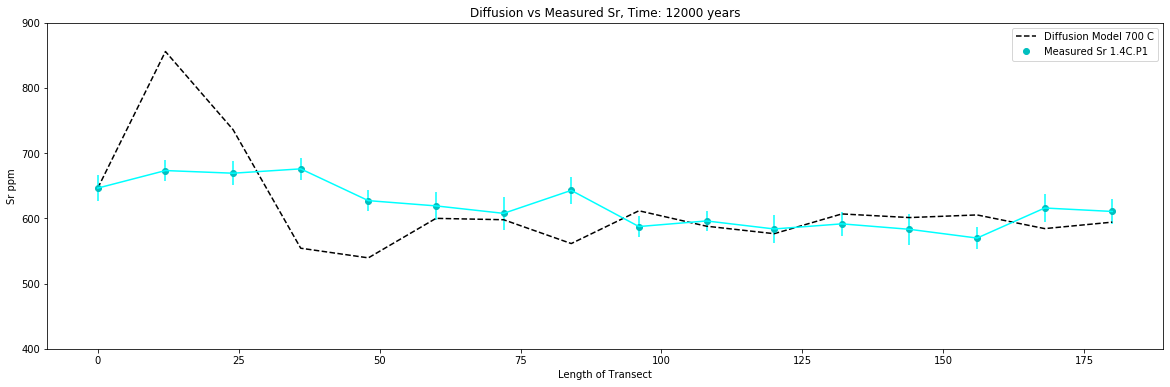

In [ ]:
while True:
    try:
        test40 = input('Do you want to do time variable 1 2 3 4 5 or 6?')
        time2 = input('How many years?')
        time2 = int(time2)
        if test40 == '1':
            Time1.append(time2)
        if test40 == '2':
            Time2.append(time2)
        if test40 == '3':
            Time3.append(time2)
        if test40 == '4':
            Time4.append(time2)
        if test40 == '5':
            Time5.append(time2)
        if test40 == '6':
            Time6.append(time2)
        s = testing()
        s.main()
        s.makeplot()
        usertest = input('Best fit?')
    except ValueError:
        continue
    if usertest == 'no':
        if test40 == '1':
            Time1 = []
        if test40 == '2':
            Time2 = []
        if test40 == '3':
            Time3 = []
        if test40 == '4':
            Time4 = []
        if test40 == '5':
            Time5 = []
        if test40 == '6':
            Time6 = []
        continue
    if usertest == 'yes':
        if test40 == '1':
            Co1.append(C1)
        if test40 == '2':
            Co2.append(C1)
        if test40 == '3':
            Co3.append(C1)
        if test40 == '4':
            Co4.append(C1)
        if test40 == '5':
            Co5.append(C1)
        if test40 == '6':
            Co6.append(C1)
        break
    else:
        break

In [ ]:
fig = plt.figure()
fig, ax = subplots()

plt.plot(An, newDsr1, 'bo')
An = np.array(An)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(An, newDsr1)
o1 = intercept1 + slope1*(An)
plt.plot(An, o1, 'b', label = 'Equilibrium Sr (m = ' +str(np.around(slope1, decimals = 2)) + ', r = ' +str(np.around(r_value1**2, decimals = 2))+')')

plt.plot(An, Sr1, 'go')
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(An, Sr1)
o3 = intercept3 + slope3*(An)
plt.plot(An, o3, 'g', label = 'Measured Sr (m = ' +str(np.around(slope3, decimals = 2))+ ', r = ' +str(np.around(r_value3**2, decimals = 2))+')')


plt.plot(An, Co1[0], 'ro')
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(An, Co1[0])
o2 = intercept2 + slope2*(An)
plt.plot(An, o2, 'r', label = str(Time1)+ ' years (m = ' +str(np.around(slope2, decimals = 2))+ ', r = ' +str(np.around(r_value2**2, decimals = 2))+')')

plt.plot(An, Co2[0], 'mo')
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(An, Co2[0])
o4 = intercept4 + slope4*(An)
plt.plot(An, o4, 'm', label = str(Time2)+ ' years (m = ' +str(np.around(slope4, decimals = 2))+ ', r = ' +str(np.around(r_value4**2, decimals = 2))+')')

plt.plot(An, Co3[0], 'yo')
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(An, Co3[0])
o5 = intercept5 + slope5*(An)
plt.plot(An, o5, 'y', label = str(Time3)+ ' years (m = ' +str(np.around(slope5, decimals = 2))+ ', r = ' +str(np.around(r_value5**2, decimals = 2))+')')

plt.plot(An, Co4[0], 'co')
slope6, intercept6, r_value6, p_value6, std_err6 = stats.linregress(An, Co4[0])
o6 = intercept6 + slope6*(An)
plt.plot(An, o6, 'c', label = str(Time4)+ ' years (m = ' +str(np.around(slope6, decimals = 2))+ ', r = ' +str(np.around(r_value6**2, decimals = 2))+')')

plt.plot(An, Co5[0], 'ko')
slope7, intercept7, r_value7, p_value7, std_err7 = stats.linregress(An, Co5[0])
o7 = intercept7 + slope7*(An)
plt.plot(An, o7, 'k', label = str(Time5)+ ' years (m = ' +str(np.around(slope7, decimals = 2))+ ', r = ' +str(np.around(r_value7**2, decimals = 2))+')')

plt.plot(An, Co6[0], 'ko')
slope8, intercept8, r_value8, p_value8, std_err8 = stats.linregress(An, Co6[0])
o8 = intercept8 + slope8*(An)
plt.plot(An, o8, 'k', label = str(Time6)+ ' years (m = ' +str(np.around(slope8, decimals = 2))+ ', r = ' +str(np.around(r_value8**2, decimals = 2))+')')

ax.set_xlabel("Anorthite (mole fraction)")
ax.set_title('SL-'+str(Label)+ ' ' +str(Temp)+ ' C')
ax.set_ylabel("Sr (ppm)")
plt.legend(loc="lower left")
fig.set_size_inches(15, 6)
fig.savefig('SL-'+str(Label)+ str(Temp)+ ' C Best Fit Lines.png')

In [ ]:
plt.plot(x, Sr1, 'xkcd:blue', linestyle='dashed', label = 'Measured Sr 750 C' )
plt.plot(x, Sr1, 'xkcd:aqua', linestyle='dashed', label = 'Measured Sr 800 C' )
plt.plot(x, Sr1, 'xkcd:orange', linestyle='dashed', label = 'Measured Sr 850 C' )
plt.plot(x, Sr1, 'xkcd:orangered', linestyle='dashed', label = 'Measured Sr 900 C' )
plt.plot(x, Sr1, 'xkcd:red', linestyle='dashed', label = 'Measured Sr 950 C' )